# ML05: A3 Support Vector Machine: Pima Indians
MSE_FTP_MachLe, WÜRC


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Pima-Indian dataset

The data set `pima-indians-diabetes.csv` contains medical indicators collected from 768 patients of the indigenous Pima tribe (Phoenix, AZ). The subjects were between 21 and 81 years old. The following characteristics were recorded:

`NumTimesPrg`: Number of pregnancies
`PlGlcConc`: Blood sugar 2h after oral uptake of sugar (oGTT) (mg/dl)
`BloodP`: Diastolic blood pressure (mm Hg)
`SkinThick`: thickness of the skin fold at the triceps (mm)
`TwoHourSerIns`: Insulin concentration after 2h oGTT ( 𝜇 IU/ mg)
`BMI`:Body Mass Index (kg/m 2 )
`DiPedFunc`: Hereditary predisposition
`Age`: Age (years)
`HasDiabetes` :Diagnosis Diabetes Type II

The classification goal is to make the diagnosis of type II diabetes based on the factors, i.e. to make a prediction model for the variable `y= HasDiabetes` using a support vector machine (SVM) with a radial basis function kernel.

![Pima Indians](women-Pima-shinny-game-field-hockey.jpg)


### Explorative Data Analysis (EDA)

Load the dataset `pima-indians-diabetes.csv` and create a `pandas` data frame from it. We take care that the column captions are imported correctly. 

In [3]:
pima = pd.read_csv('./pima-indians-diabetes.csv', header=None)
pima.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

Display the first 5 entries of the dataset.


In [4]:
pima.head(5)

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



It is already noticeable here that the insulin values of some patients have the value '0'. 

### (a) Calculate the percentage of patients with diabetes and display a statistics using `df.describe`
We can calculate the percentage of the patients with diabetes by determining the mean value of the response column 'HasDiabetes'. Using the `dataframe.describe()`, we can print the main statistics of the dataset.

In [5]:
perc_diab = pima['HasDiabetes'].mean()

print('percentage of diabetes: %f ' % np.round(perc_diab*100, 2))

y = pima['HasDiabetes']
X = pima.drop('HasDiabetes', axis=1)

X_names = X.columns
pima.describe()

percentage of diabetes: 34.900000 


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some characteristics take the value 0, although this makes no medical sense. These are

- `PlGlcConc`
- `BloodP`
- `SkinThick`
- `TwoHourSerins`
- `BMI`

For example, the insulin value has at least a quarter missing. For these characteristics, we replace the 0 values with `np.nan` and then count again. For all other characteristics we do not know whether there are any other missing values.

### (b) Exlude samples with zero entries or missing values

Replace the 0 values with `np.nan`and print again a statstical description of the dataset using `df.describe()`. Then drop `np.nan` values using `df.dropna()`.

In [6]:
print(X_names.values)

['NumTimesPrg' 'PlGlcConc' 'BloodP' 'SkinThick' 'TwoHourSerIns' 'BMI'
 'DiPedFunc' 'Age']


In [7]:
pima2 = pima.loc[:,X_names.values]
target= pima['HasDiabetes']
pima2.replace(0, np.nan,inplace=True)
pima2['HasDiabetes']=target

pima2.dropna(axis=0,inplace=True)
pima=pima2

In [8]:
pima.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


### (c) Plot a histogram of the of each feature and the the target using `df.hist()`

<Figure size 432x288 with 0 Axes>

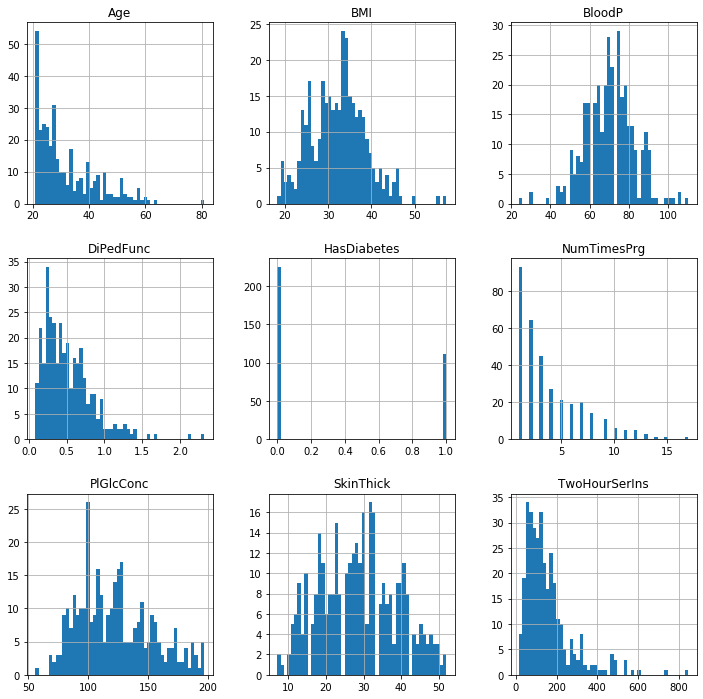

In [9]:
plt.figure()
pima.hist(figsize=(12,12),bins=50)
plt.show()

### (d) Split the data in 80% training and 20% test data

   Use `train_test_split` from `sklearn.model_selection`. If you feed a `pandas.Dataframe` as an input to the method, you will also get `pandas.Dataframes` as output for the training and test features. This is quite practical.

In [10]:
from sklearn.model_selection import train_test_split

Xtr, Xtest, ytrain, ytest = train_test_split(pima.loc[:,X_names.values],pima.HasDiabetes,train_size=0.8)
 
Xtr.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
368,3.0,81.0,86.0,16.0,66.0,27.5,0.306,22
302,5.0,77.0,82.0,41.0,42.0,35.8,0.156,35
744,13.0,153.0,88.0,37.0,140.0,40.6,1.174,39
396,3.0,96.0,56.0,34.0,115.0,24.7,0.944,39
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23


### (e) Standardize the features using the `StandardScaler` from `sklearn.preprocessing`
Standardize the features using the `StandardScaler` from `sklearn.preprocessing` and display the histograms of the features again.

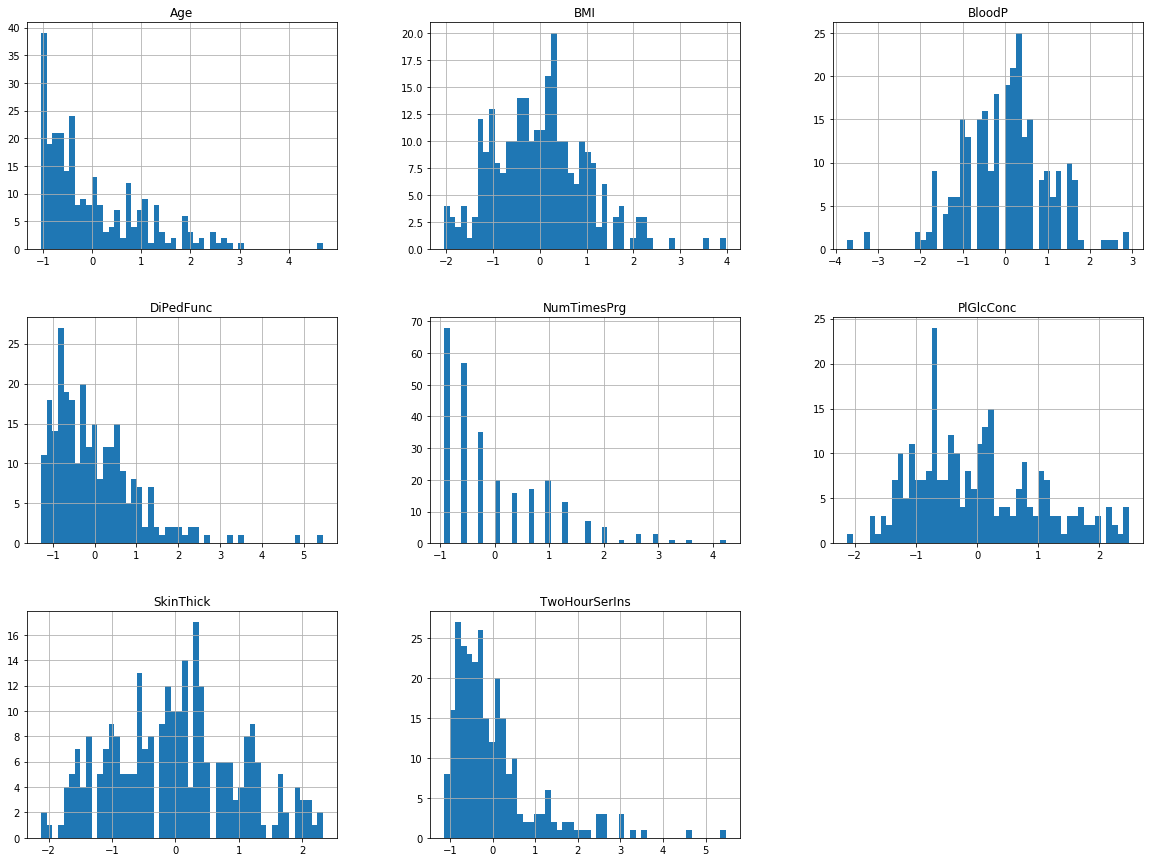

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_scale = scaler.fit_transform(Xtr)
Xtest_scale = scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain_scale, columns=X.columns)
Xtrain.hist(bins=50, figsize=(20, 15))
plt.show()

###  (f) Train a support vector machine with a radial basis function kernel and determine the accuracy on the test data.



In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model=SVC(gamma=1, C=1)
model.fit(Xtrain, ytrain)
ypred=model.predict(Xtest)
print('Accuracy: %f' % accuracy_score(ytest, ypred))



Accuracy: 0.588235


### (g) Perform a cross validated grid search `GridSearchCV` to find the best parameters for $\gamma$ and $C$ and determine the best parameters and score
- vary the value of $C$ in the range in a logarithmic scale from $10^{-3}$ to $10^{+3}$ (7 steps)
- vary the value of $\gamma$ in the range in a logarithmic scale from $10^{-3}$ to $10^{+3}$ (7 steps)
- print a classification report and a confusion matrix of the best classifier using `classification_report` and `confusion_matrix` from `sklearn.metrics`.


In [13]:
C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)

model=SVC()

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=cv,n_jobs=-1)
grid.fit(Xtrain, ytrain)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))



The best parameters are {'C': 1000.0, 'gamma': 0.001} with a score of 0.77


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = grid.best_estimator_.predict(Xtest)
target_names = ['negative', 'positive']
print(classification_report(ytest, ypred, target_names=target_names))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

    negative       0.59      1.00      0.74        40
    positive       0.00      0.00      0.00        28

    accuracy                           0.59        68
   macro avg       0.29      0.50      0.37        68
weighted avg       0.35      0.59      0.44        68

[[40  0]
 [28  0]]


C:\Users\wurc\.conda\envs\ML\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### (h) Plot the resulting decision boundary of the SVM classifier for different values of $\gamma$ and $C$ as contour plot in 2D
 
Use the following features as the only features for the prediction such that we can display the decision boundary in a 2D plot. 
- feature 1: `TwoHourSerIns` (x1-axis)
- feature 2: `Age` (x2-axis) 

Vary the C parameters in the following ranges:
- `C_range = [1e-2, 1, 1e2]`
- `gamma_range = [1e-1, 1, 1e1]`

You can use the helper function `PlotDecisionBoundary(model, X2D, y)` to plot the decision boundary and the margins of the classifier. 


In [15]:
print(X_names.values)

Xtrain_2D=Xtrain.loc[:,['TwoHourSerIns','Age']]


['NumTimesPrg' 'PlGlcConc' 'BloodP' 'SkinThick' 'TwoHourSerIns' 'BMI'
 'DiPedFunc' 'Age']


In [16]:
def PlotDecisionBoundary(model, X2D, y):

    gamma=model.gamma
    C=model.C
    x1=X2D.iloc[:,0]
    x2=X2D.iloc[:,1]
        
    # evaluate decision function in a grid
    xx, yy = np.meshgrid(np.linspace(-2, 2, 200), np.linspace(-2, 2, 200))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
            size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, -Z)
    plt.scatter(x1, x2, c=y, cmap=plt.cm.RdBu_r, edgecolors='k')
    plt.xlim([-2,2])
    plt.ylim([-2,2])


In [17]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(Xtrain_2D, ytrain)
        classifiers.append((C, gamma, clf))

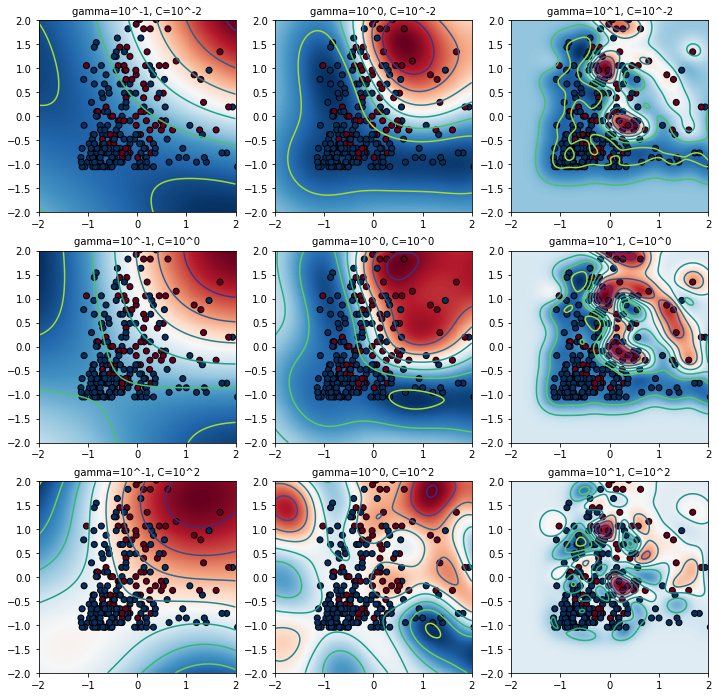

In [18]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(12, 12))
for (k, (C, gamma, clf)) in enumerate(classifiers):

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), k + 1)
    PlotDecisionBoundary(clf, Xtrain_2D, ytrain)
plt.savefig('diabetes.pdf')